Importing the Libraries for Data-Description

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data from 'dataset.csv' file and create a dataframe

In [12]:
df = pd.read_csv('dataset.csv')
df.shape

(5027, 13)

In [13]:
df.head()

,Length of URL,Has IP address,Shortening Service,Having @ Symbol,Double Slash Redirecting,Prefix-Suffix,Standard Port,CTLD,HTTPS in Domain,Sensitive Words,Has Tilde,Has Port,Result
0,1,1,-1,1,1,-1,0,1,-1,1,1,-1,1
1,1,1,1,1,1,1,0,1,-1,-1,1,-1,1
2,1,1,1,1,1,1,0,1,-1,-1,1,-1,1
3,1,1,1,1,1,1,0,-1,-1,1,1,-1,1
4,1,1,1,1,1,1,0,0,-1,1,1,-1,1


In [14]:
df.columns  

Index(['Length of URL', ' Has IP address', ' Shortening Service',
       ' Having @ Symbol', ' Double Slash Redirecting', ' Prefix-Suffix',
       ' Standard Port', ' CTLD', ' HTTPS in Domain', ' Sensitive Words',
       ' Has Tilde', ' Has Port', 'Result'],
      dtype='object')

As the column names have leading white spaces, we will rename the columns

In [15]:
df.rename(columns={' Has IP address':'Has_IP_address', ' Shortening Service':'Shortening_Service', ' Having @ Symbol':'Having_@_Symbol', ' Double Slash Redirecting':'Double_Slash_Redirecting', ' Prefix-Suffix':'Prefix-Suffix', ' Standard Port':'Standard_Port', ' CTLD':'CTLD', ' HTTPS in Domain':'HTTPS_in_Domain', ' Sensitive Words':'Sensitive_Words', ' Has Tilde':'Has_Tilde', ' Has Port':'Has_Port', ' Result':'Result'}, inplace=True)

As we had merged two csv files to create a dataset, we need to check the unique values present in each column

In [16]:
# Investigate unique values in the each column
unique_IP = df['Has_IP_address'].unique()
unique_SS = df['Shortening_Service'].unique()
unique_HAS = df['Having_@_Symbol'].unique()
unique_DSR = df['Double_Slash_Redirecting'].unique()
unique_PS = df['Prefix-Suffix'].unique()
unique_SP = df['Standard_Port'].unique()
unique_CTLD = df['CTLD'].unique()
unique_HID = df['HTTPS_in_Domain'].unique()
unique_SW = df['Sensitive_Words'].unique()
unique_HT = df['Has_Tilde'].unique()
unique_HP = df['Has_Port'].unique()
unique_R = df['Result'].unique()

In [17]:
print(unique_IP)
print(unique_SS)
print(unique_HAS)
print(unique_DSR)
print(unique_PS)
print(unique_SP)
print(unique_CTLD)
print(unique_HID)
print(unique_SW)
print(unique_HT)
print(unique_HP)
print(unique_R)

['1' '-1' 'Has IP address']
['-1' '1' 'Shortening Service']
['1' '-1' 'Having @ Symbol']
['1' '-1' 'Double Slash Redirecting']
['-1' '1' 'Prefix-Suffix']
['0' '-1' 'Standard Port']
['1' '-1' '0' 'CTLD']
['-1' 'HTTPS in Domain']
['1' '-1' 'Sensitive Words']
['1' '-1' 'Has Tilde']
['-1' '1' 'Has Port']
['1' 'Result' '-1']


As there are white-space along with 1, 0, and -1 we need to remove rest of the things, and then convert the values to int 

In [20]:
validValues = {-1, 0, 1}

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[column].isin(validValues)]

# Convert all columns to integers (again after the filtering)
df = df.astype(int)

In [19]:
# Now you can use the DataFrame with valid integer values (1, -1, and 0)
print(df)

      Length of URL  Has_IP_address  Shortening_Service  Having_@_Symbol  \
0                 1               1                  -1                1   
1                 1               1                   1                1   
2                 1               1                   1                1   
3                 1               1                   1                1   
4                 1               1                   1                1   
...             ...             ...                 ...              ...   
5022              1               1                   1                1   
5023              1               1                   1                1   
5024              1               1                   1                1   
5025              1               1                   1                1   
5026              1               1                   1                1   

      Double_Slash_Redirecting  Prefix-Suffix  Standard_Port  CTLD  \
0                

Again check for the unique values present in each column

In [21]:
# Investigate unique values in the each column
unique_IP_2 = df['Has_IP_address'].unique()
unique_SS_2 = df['Shortening_Service'].unique()
unique_HAS_2 = df['Having_@_Symbol'].unique()
unique_DSR_2 = df['Double_Slash_Redirecting'].unique()
unique_PS_2 = df['Prefix-Suffix'].unique()
unique_SP_2 = df['Standard_Port'].unique()
unique_CTLD_2 = df['CTLD'].unique()
unique_HID_2 = df['HTTPS_in_Domain'].unique()
unique_SW_2 = df['Sensitive_Words'].unique()
unique_HT_2 = df['Has_Tilde'].unique()
unique_HP_2 = df['Has_Port'].unique()
unique_R_2 = df['Result'].unique()

In [22]:
print(unique_IP_2)
print(unique_SS_2)
print(unique_HAS_2)
print(unique_DSR_2)
print(unique_PS_2)
print(unique_SP_2)
print(unique_CTLD_2)
print(unique_HID_2)
print(unique_SW_2)
print(unique_HT_2)
print(unique_HP_2)
print(unique_R_2)

[ 1 -1]
[-1  1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 0 -1]
[ 1 -1  0]
[-1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1]


In [23]:
df.shape

(5026, 13)

In [24]:
print("number of 1",len(df[df["Result"]==1]))
print("number of -1",len(df[df["Result"]==-1]))

number of 1 2713
number of -1 2313


We now find the correlation between the columns values

In [25]:
corr=df.corr()
corr

,Length of URL,Has_IP_address,Shortening_Service,Having_@_Symbol,Double_Slash_Redirecting,Prefix-Suffix,Standard_Port,CTLD,HTTPS_in_Domain,Sensitive_Words,Has_Tilde,Has_Port,Result
Length of URL,1.000000,-0.037023,-0.050387,0.139842,0.190540,0.126952,0.029635,0.217384,NaN,0.079310,0.058561,-0.026312,0.135408
Has_IP_address,-0.037023,1.000000,-0.017877,-0.007723,-0.011657,-0.038348,-0.004442,0.116156,NaN,-0.005635,-0.003220,0.004558,-0.010937
Shortening_Service,-0.050387,-0.017877,1.000000,-0.002416,0.035630,-0.078403,0.026375,-0.071654,NaN,0.053708,-0.011069,-0.024926,-0.141731
Having_@_Symbol,0.139842,-0.007723,-0.002416,1.000000,0.447844,-0.034293,-0.006598,0.023104,NaN,-0.001797,-0.004782,0.006770,-0.057423
Double_Slash_Redirecting,0.190540,-0.011657,0.035630,0.447844,1.000000,-0.076828,0.031201,-0.002632,NaN,0.168289,-0.007218,-0.029904,-0.141663
Prefix-Suffix,0.126952,-0.038348,-0.078403,-0.034293,-0.076828,1.000000,-0.032759,0.116914,NaN,-0.032445,-0.002203,0.033613,0.380456
Standard_Port,0.029635,-0.004442,0.026375,-0.006598,0.031201,-0.032759,1.000000,0.005104,NaN,0.111299,-0.002750,-0.974582,-0.056879
CTLD,0.217384,0.116156,-0.071654,0.023104,-0.002632,0.116914,0.005104,1.000000,NaN,-0.003882,0.015564,-0.010066,0.315811
HTTPS_in_Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sensitive_Words,0.079310,-0.005635,0.053708,-0.001797,0.168289,-0.032445,0.111299,-0.003882,NaN,1.000000,-0.010927,-0.121406,-0.108400


<Axes: >

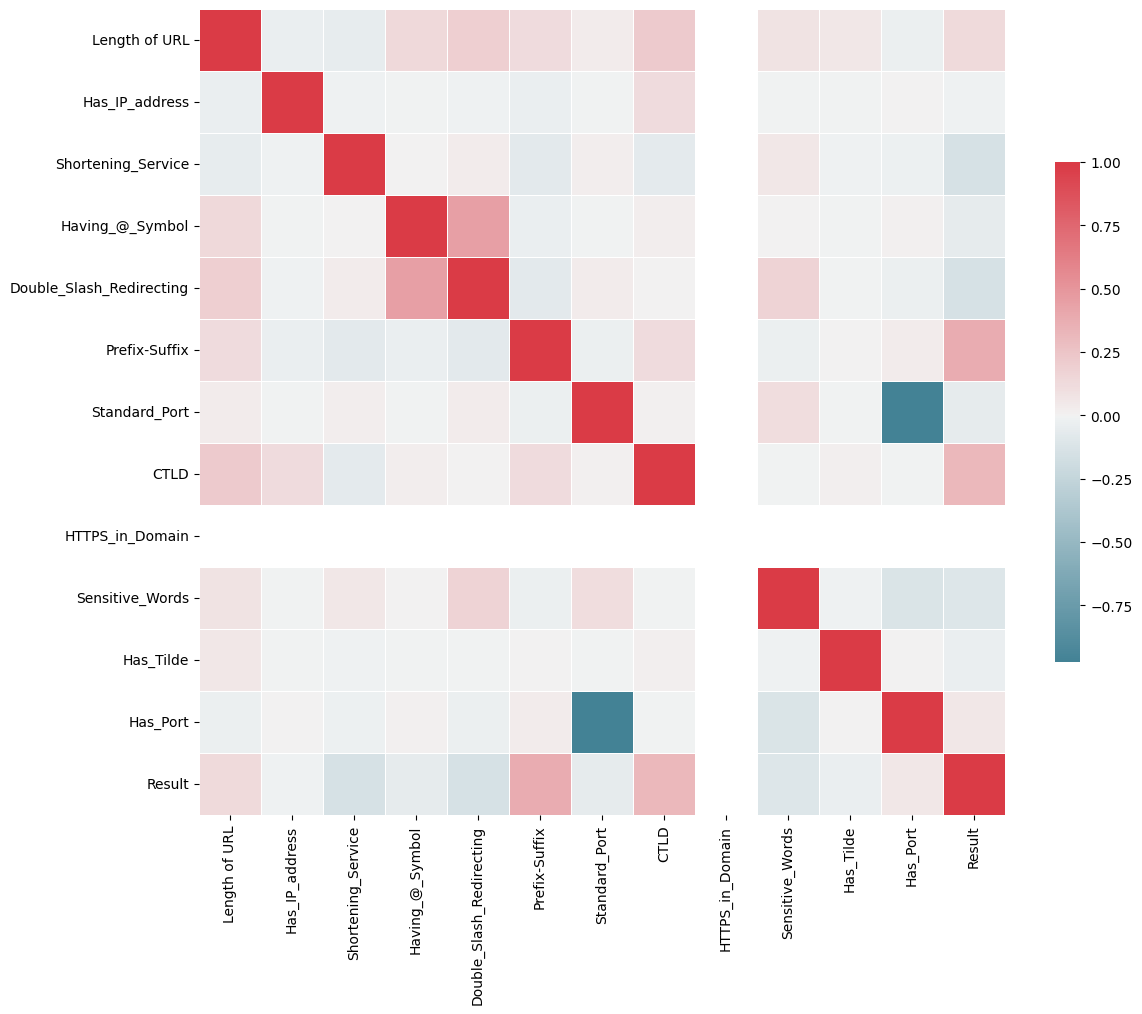

In [26]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})